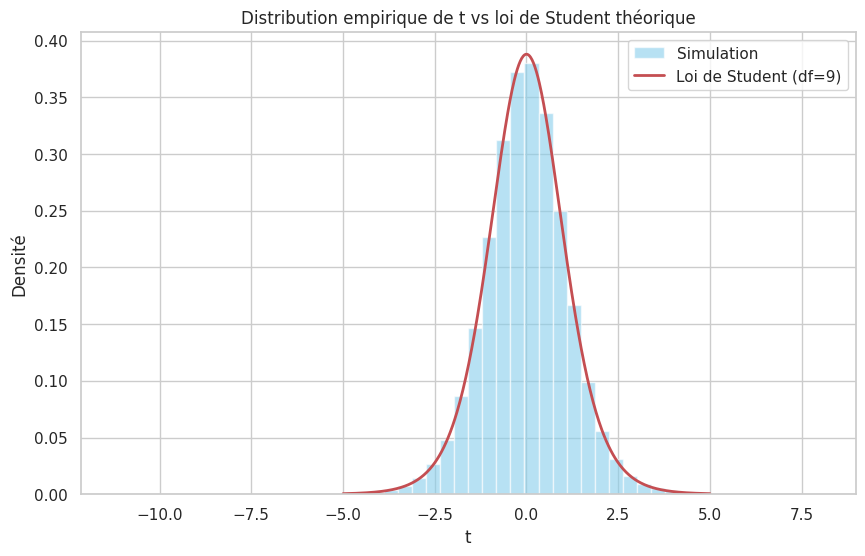

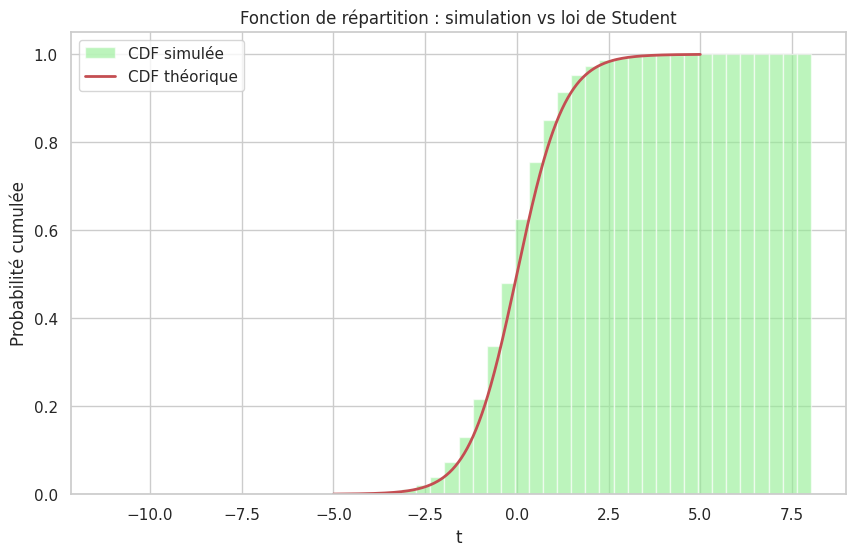

In [25]:
# Objectif : illustrer empiriquement que la statistique t suit
# une loi de Student lorsque l'on échantillonne une population normale.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# -------------------------------------------------------------------
# Paramètres de la simulation
# -------------------------------------------------------------------
n = 10              # taille d'un échantillon
mu = 0              # moyenne théorique de la population
sigma = 1           # écart-type de la population
n_samples = 200000  # nombre d'échantillons simulés

# -------------------------------------------------------------------
# Génération des échantillons et calcul de la statistique t
# -------------------------------------------------------------------
t_values = []

for _ in range(n_samples):
    sample = np.random.normal(loc=mu, scale=sigma, size=n)
    x_bar = np.mean(sample)                 # moyenne échantillon
    s = np.std(sample, ddof=1)             # écart-type échantillon (non-biaisé)
    t = (x_bar - mu) / (s / np.sqrt(n))    # statistique t
    t_values.append(t)

t_values = np.array(t_values)

# -------------------------------------------------------------------
# Comparaison : histogramme simulé vs densité théorique
# -------------------------------------------------------------------
plt.figure(figsize=(10,6))
plt.hist(t_values, bins=50, density=True, alpha=0.6, color='skyblue', label="Simulation")

df = n - 1  # degrés de liberté
x = np.linspace(-5, 5, 500)
plt.plot(x, stats.t.pdf(x, df), 'r', lw=2, label=f"Loi de Student (df={df})")

plt.title("Distribution empirique de t vs loi de Student théorique")
plt.xlabel("t")
plt.ylabel("Densité")
plt.legend()
plt.show()

# -------------------------------------------------------------------
# Comparaison des fonctions de répartition (CDF)
# -------------------------------------------------------------------
plt.figure(figsize=(10,6))
plt.hist(t_values, bins=50, density=True, cumulative=True, alpha=0.6, color='lightgreen', label="CDF simulée")
plt.plot(x, stats.t.cdf(x, df), 'r', lw=2, label="CDF théorique")

plt.title("Fonction de répartition : simulation vs loi de Student")
plt.xlabel("t")
plt.ylabel("Probabilité cumulée")
plt.legend()
plt.show()


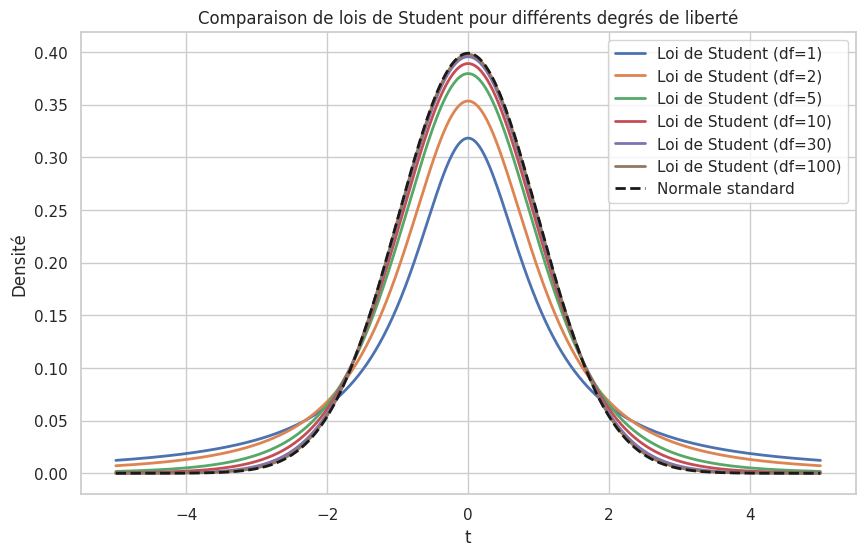

In [26]:
# Objectif : comparer l'influence des degrés de liberté (df) sur la forme
# de la loi de Student, et montrer la convergence vers la loi normale.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# -------------------------------------------------------------------
# Définition des degrés de liberté à comparer
# -------------------------------------------------------------------
dfs = [1, 2, 5, 10, 30, 100]

# Axe des abscisses
x = np.linspace(-5, 5, 500)

# -------------------------------------------------------------------
# Tracé des lois de Student pour différents df
# -------------------------------------------------------------------
plt.figure(figsize=(10,6))

for df in dfs:
    y = stats.t.pdf(x, df)
    plt.plot(x, y, lw=2, label=f"Loi de Student (df={df})")

# -------------------------------------------------------------------
# Ajout de la loi normale standard (moyenne=0, sigma=1)
# -------------------------------------------------------------------
y_norm = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, y_norm, 'k--', lw=2, label="Normale standard")

# Mise en forme du graphique
plt.title("Comparaison de lois de Student pour différents degrés de liberté")
plt.xlabel("t")
plt.ylabel("Densité")
plt.legend()
plt.show()


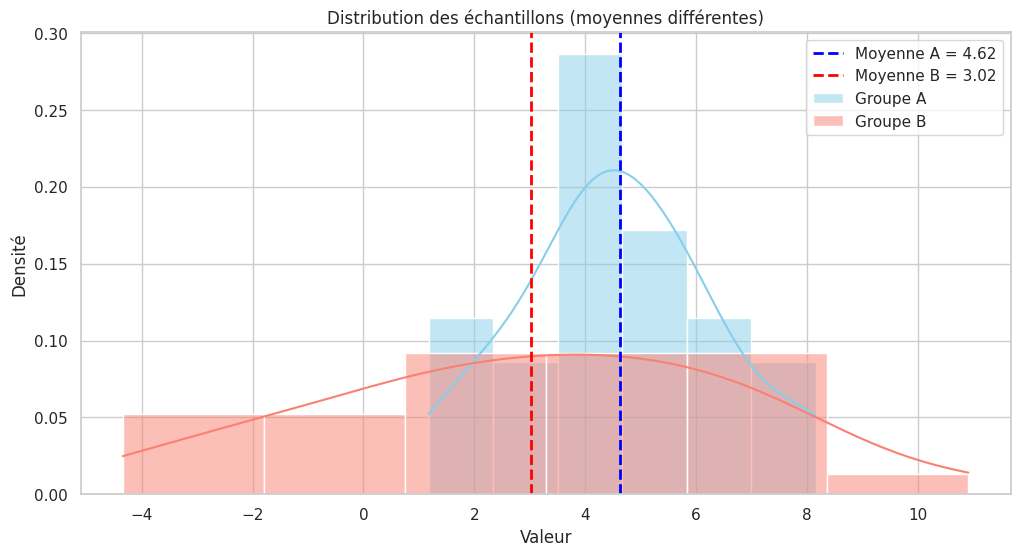

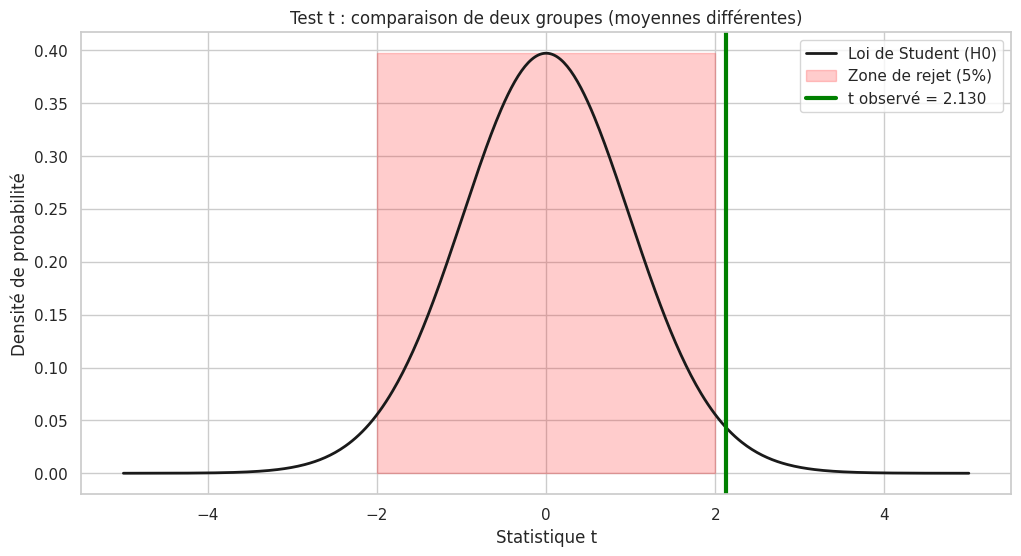


Groupe A : mean = 4.624, std = 1.800
Groupe B : mean = 3.015, std = 3.724

t observé     = 2.130
Degrés liberté ≈ 58
p-value       ≈ 0.037



In [29]:
# Test de Student : comparaison de deux groupes (moyennes différentes)
# -------------------------------------------------------------------
# Objectif :
# - Générer deux échantillons avec moyennes et variances différentes
# - Calculer la statistique t et la comparer à la loi de Student sous H0
# - Visualiser à la fois les données brutes et l'interprétation statistique

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Style graphique
sns.set(style="whitegrid")
np.random.seed(42)

# -------------------------------------------------------------------
# Paramètres des échantillons
# -------------------------------------------------------------------
n_users = 30
mu_A = 5.0       # moyenne théorique du groupe A
mu_B = 3.5       # moyenne théorique du groupe B
sigma_A = 2.0    # écart-type du groupe A
sigma_B = 4.0    # écart-type du groupe B

# -------------------------------------------------------------------
# Génération des données
# -------------------------------------------------------------------
errors_A = np.random.normal(mu_A, sigma_A, n_users)
errors_B = np.random.normal(mu_B, sigma_B, n_users)

# Statistiques descriptives
mean_A, mean_B = np.mean(errors_A), np.mean(errors_B)
std_A, std_B   = np.std(errors_A, ddof=1), np.std(errors_B, ddof=1)

# -------------------------------------------------------------------
# Visualisation des distributions empiriques
# -------------------------------------------------------------------
plt.figure(figsize=(12,6))
sns.histplot(errors_A, color='skyblue', kde=True, stat='density', label='Groupe A')
sns.histplot(errors_B, color='salmon', kde=True, stat='density', label='Groupe B')

plt.axvline(mean_A, color='blue', linestyle='--', lw=2, label=f"Moyenne A = {mean_A:.2f}")
plt.axvline(mean_B, color='red', linestyle='--', lw=2, label=f"Moyenne B = {mean_B:.2f}")

plt.title("Distribution des échantillons (moyennes différentes)")
plt.xlabel("Valeur")
plt.ylabel("Densité")
plt.legend()
plt.show()

# -------------------------------------------------------------------
# Calcul de la statistique t
# -------------------------------------------------------------------
t_stat = (mean_A - mean_B) / np.sqrt(std_A**2/n_users + std_B**2/n_users)
df = n_users + n_users - 2  # approximation classique
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# -------------------------------------------------------------------
# Visualisation de la loi de Student et du t observé
# -------------------------------------------------------------------
plt.figure(figsize=(12,6))

# Loi de Student sous H0
x = np.linspace(-5, 5, 500)
t_pdf = stats.t.pdf(x, df)
plt.plot(x, t_pdf, 'k-', lw=2, label='Loi de Student (H0)')

# Zone critique (alpha = 5%)
alpha = 0.05
crit = stats.t.ppf([alpha/2, 1-alpha/2], df)
plt.fill_betweenx([0, max(t_pdf)], crit[0], crit[1],
                  color='red', alpha=0.2, label='Zone de rejet (5%)')

# Valeur observée
plt.axvline(t_stat, color='green', lw=3, label=f't observé = {t_stat:.3f}')

plt.title("Test t : comparaison de deux groupes (moyennes différentes)")
plt.xlabel("Statistique t")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.show()

# -------------------------------------------------------------------
# Résultats numériques
# -------------------------------------------------------------------
print(f"""
Groupe A : mean = {mean_A:.3f}, std = {std_A:.3f}
Groupe B : mean = {mean_B:.3f}, std = {std_B:.3f}

t observé     = {t_stat:.3f}
Degrés liberté ≈ {df}
p-value       ≈ {p_value:.3f}
""")


Moyenne échantillon = 4.673
Ecart-type échantillon = 1.913

t-statistique = 0.452
Degrés de liberté = 24
p-value = 0.655


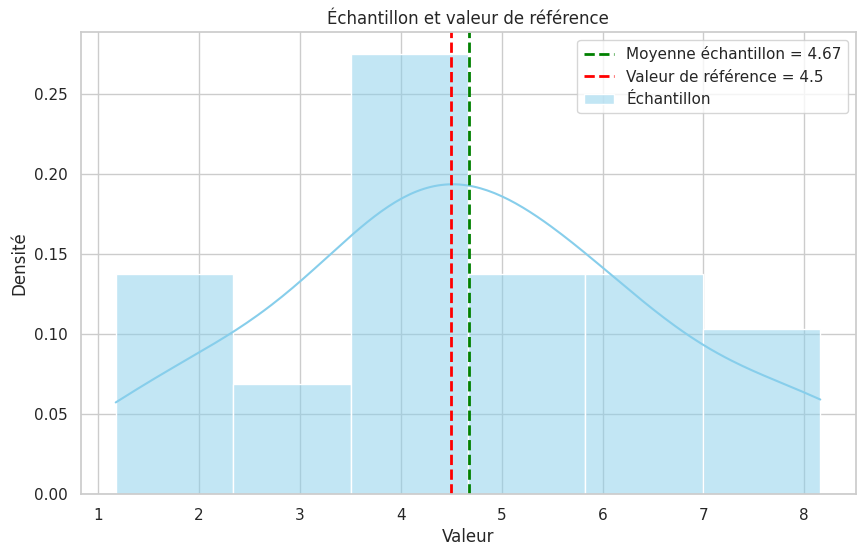

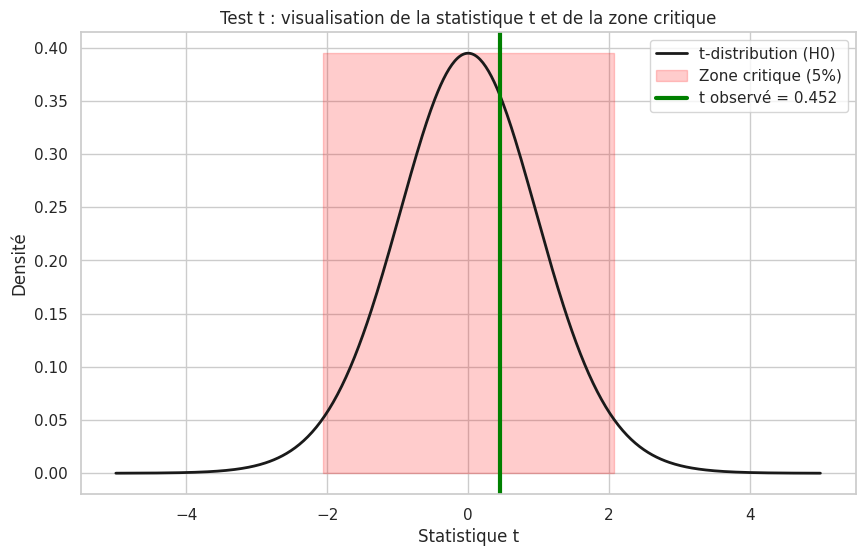

👉 On ne rejette pas H0 : pas de différence significative détectée


In [31]:
# Test t pour un échantillon (one-sample t-test) avec visualisation de la t-distribution
# -------------------------------------------------------------------

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
np.random.seed(42)

# -------------------------------
# 1. Générer un échantillon
# -------------------------------
n = 25                       # taille de l'échantillon
mu_true = 5                  # vraie moyenne sous-jacente
sigma = 2                    # écart-type sous-jacent

sample = np.random.normal(mu_true, sigma, n)

# Moyenne et écart-type observés
x_bar = np.mean(sample)
s = np.std(sample, ddof=1)

print(f"Moyenne échantillon = {x_bar:.3f}")
print(f"Ecart-type échantillon = {s:.3f}")

# -------------------------------
# 2. Hypothèses
# -------------------------------
mu_0 = 4.5   # valeur de référence
# H0 : moyenne = mu_0
# H1 : moyenne ≠ mu_0

# -------------------------------
# 3. Calcul du t-statistique
# -------------------------------
t_stat = (x_bar - mu_0) / (s / np.sqrt(n))
df = n - 1
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

print(f"\nt-statistique = {t_stat:.3f}")
print(f"Degrés de liberté = {df}")
print(f"p-value = {p_value:.3f}")

# -------------------------------
# 4. Visualisation de l'échantillon
# -------------------------------
plt.figure(figsize=(10,6))
sns.histplot(sample, kde=True, color='skyblue', stat='density', label='Échantillon')
plt.axvline(x_bar, color='green', linestyle='--', lw=2, label=f'Moyenne échantillon = {x_bar:.2f}')
plt.axvline(mu_0, color='red', linestyle='--', lw=2, label=f'Valeur de référence = {mu_0}')
plt.title("Échantillon et valeur de référence")
plt.xlabel("Valeur")
plt.ylabel("Densité")
plt.legend()
plt.show()

# -------------------------------
# 5. Visualisation de la t-distribution
# -------------------------------
plt.figure(figsize=(10,6))

# t-distribution théorique sous H0
x = np.linspace(-5, 5, 500)
t_pdf = stats.t.pdf(x, df)
plt.plot(x, t_pdf, 'k-', lw=2, label='t-distribution (H0)')

# Zone critique bilatérale (alpha = 0.05)
alpha = 0.05
crit = stats.t.ppf([alpha/2, 1-alpha/2], df)
plt.fill_betweenx([0, max(t_pdf)], crit[0], crit[1], color='red', alpha=0.2, label='Zone critique (5%)')

# t observé
plt.axvline(t_stat, color='green', lw=3, label=f't observé = {t_stat:.3f}')

plt.title("Test t : visualisation de la statistique t et de la zone critique")
plt.xlabel("Statistique t")
plt.ylabel("Densité")
plt.legend()
plt.show()

# -------------------------------
# 6. Interprétation
# -------------------------------
if p_value < 0.05:
    print("👉 On rejette H0 : la moyenne diffère significativement de mu_0")
else:
    print("👉 On ne rejette pas H0 : pas de différence significative détectée")


Groupe A : mean = 4.673, std = 1.913
Groupe B : mean = 3.281, std = 2.314

t-statistique = 2.317
Degrés de liberté ≈ 48
p-value ≈ 0.025


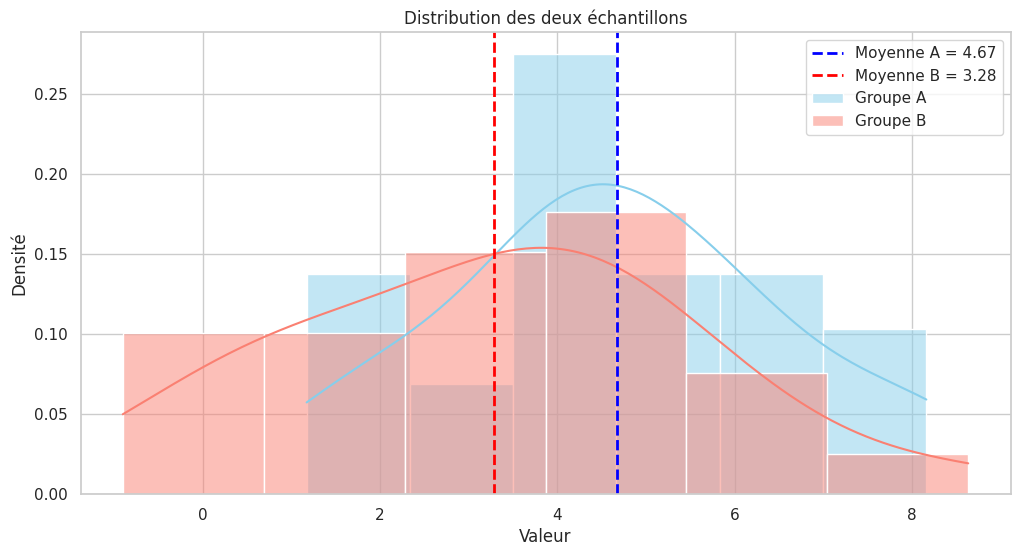

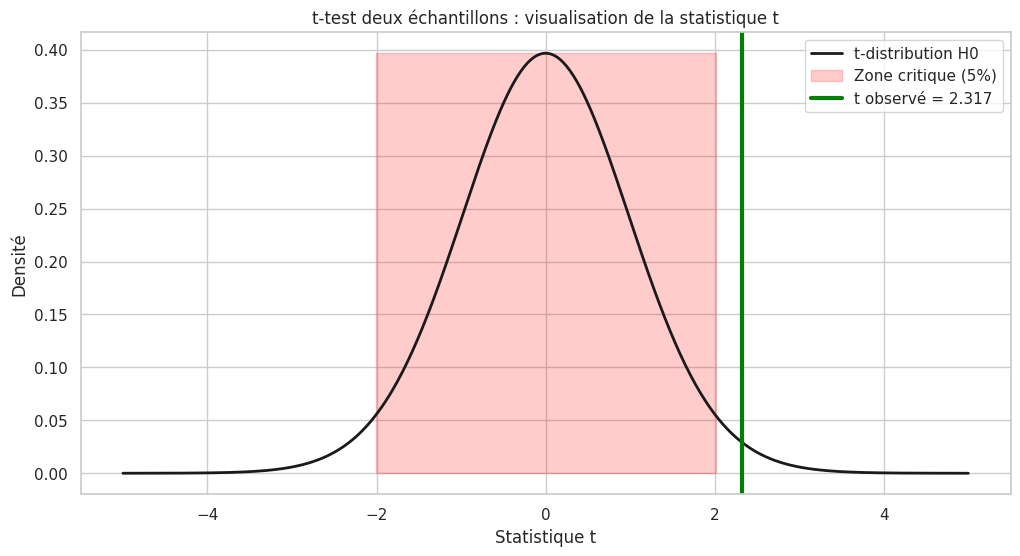

👉 On rejette H0 : les moyennes des deux groupes diffèrent significativement


In [32]:
# Test t pour deux échantillons indépendants avec visualisation
# -------------------------------------------------------------------

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
np.random.seed(42)

# -------------------------------
# 1. Paramètres des échantillons
# -------------------------------
n_A = 25
n_B = 25
mu_A = 5.0
mu_B = 4.0   # moyenne différente
sigma_A = 2.0
sigma_B = 2.5

# -------------------------------
# 2. Générer les échantillons
# -------------------------------
sample_A = np.random.normal(mu_A, sigma_A, n_A)
sample_B = np.random.normal(mu_B, sigma_B, n_B)

mean_A, mean_B = np.mean(sample_A), np.mean(sample_B)
std_A, std_B = np.std(sample_A, ddof=1), np.std(sample_B, ddof=1)

print(f"Groupe A : mean = {mean_A:.3f}, std = {std_A:.3f}")
print(f"Groupe B : mean = {mean_B:.3f}, std = {std_B:.3f}")

# -------------------------------
# 3. Calculer t et degrés de liberté
# -------------------------------
t_stat = (mean_A - mean_B) / np.sqrt(std_A**2/n_A + std_B**2/n_B)
df = n_A + n_B - 2  # approximation classique pour var. inégales (on peut utiliser Welch sinon)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

print(f"\nt-statistique = {t_stat:.3f}")
print(f"Degrés de liberté ≈ {df}")
print(f"p-value ≈ {p_value:.3f}")

# -------------------------------
# 4. Visualisation des échantillons
# -------------------------------
plt.figure(figsize=(12,6))
sns.histplot(sample_A, color='skyblue', kde=True, stat='density', label='Groupe A')
sns.histplot(sample_B, color='salmon', kde=True, stat='density', label='Groupe B')
plt.axvline(mean_A, color='blue', linestyle='--', lw=2, label=f'Moyenne A = {mean_A:.2f}')
plt.axvline(mean_B, color='red', linestyle='--', lw=2, label=f'Moyenne B = {mean_B:.2f}')
plt.title("Distribution des deux échantillons")
plt.xlabel("Valeur")
plt.ylabel("Densité")
plt.legend()
plt.show()

# -------------------------------
# 5. Visualisation t-distribution avec zone critique et t observé
# -------------------------------
plt.figure(figsize=(12,6))

# t-distribution théorique sous H0 (différence moyenne = 0)
x = np.linspace(-5, 5, 500)
t_pdf = stats.t.pdf(x, df)
plt.plot(x, t_pdf, 'k-', lw=2, label='t-distribution H0')

# Zone critique bilatérale (alpha = 0.05)
alpha = 0.05
crit = stats.t.ppf([alpha/2, 1-alpha/2], df)
plt.fill_betweenx([0, max(t_pdf)], crit[0], crit[1], color='red', alpha=0.2, label='Zone critique (5%)')

# t observé
plt.axvline(t_stat, color='green', lw=3, label=f't observé = {t_stat:.3f}')

plt.title("t-test deux échantillons : visualisation de la statistique t")
plt.xlabel("Statistique t")
plt.ylabel("Densité")
plt.legend()
plt.show()

# -------------------------------
# 6. Interprétation
# -------------------------------
if p_value < 0.05:
    print("👉 On rejette H0 : les moyennes des deux groupes diffèrent significativement")
else:
    print("👉 On ne rejette pas H0 : pas de différence significative détectée")


Groupe A : mean = 4.673, std = 1.913
Groupe B : mean = 3.281, std = 2.314
Intervalle de confiance à 95% pour la différence de moyennes : [0.184, 2.599]


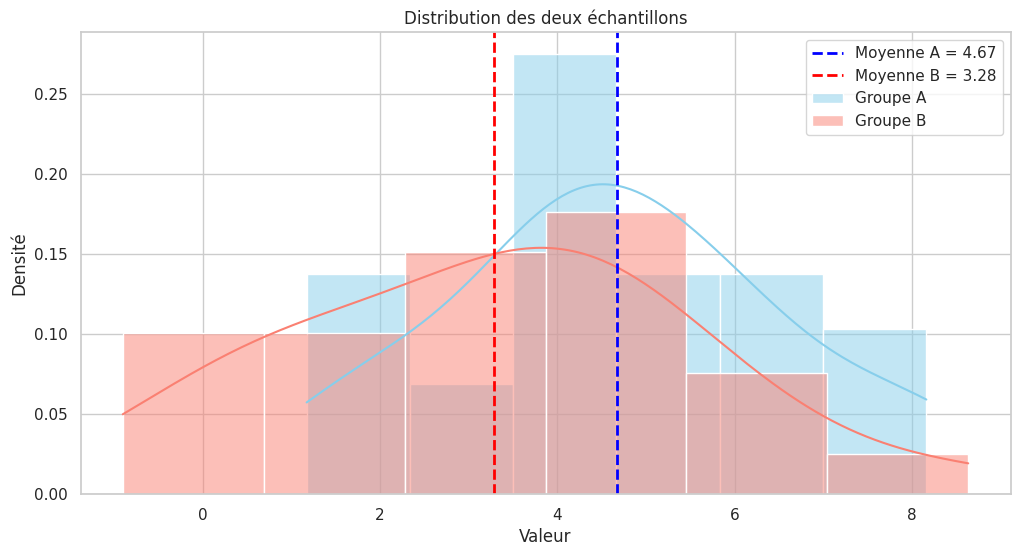

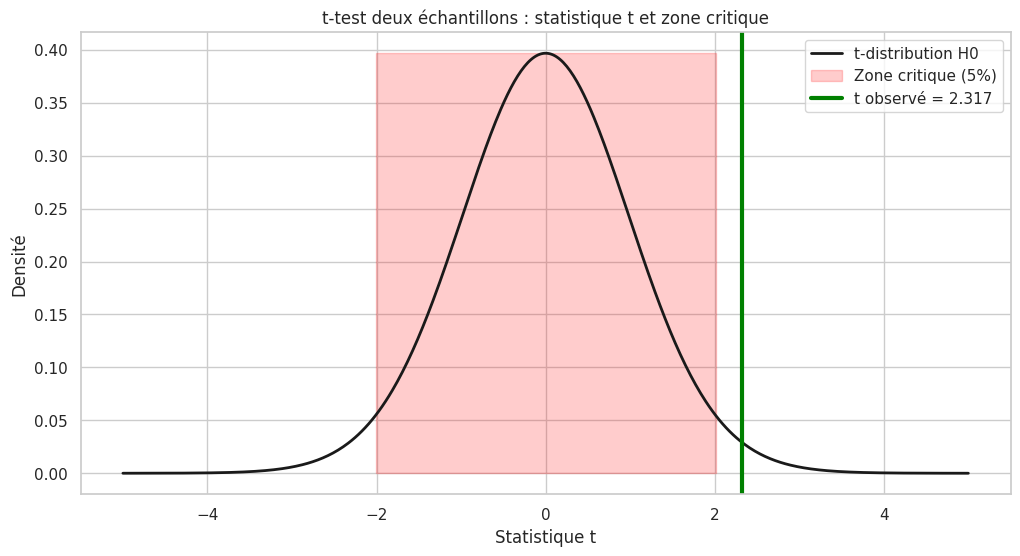

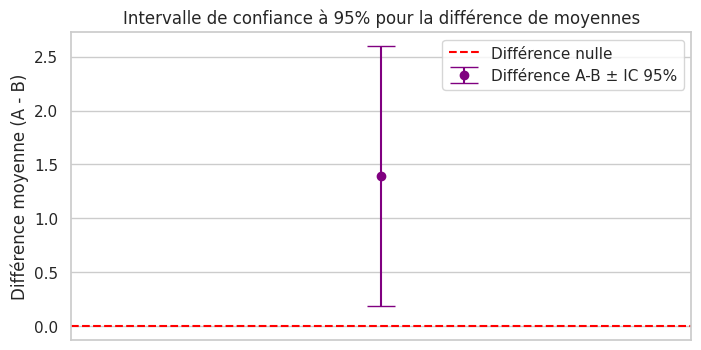

👉 On rejette H0 : les moyennes des deux groupes diffèrent significativement


In [33]:
# Test t pour deux échantillons indépendants avec visualisation et intervalle de confiance
# -------------------------------------------------------------------

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
np.random.seed(42)

# -------------------------------
# 1. Paramètres des échantillons
# -------------------------------
n_A = 25
n_B = 25
mu_A = 5.0
mu_B = 4.0   # moyenne différente
sigma_A = 2.0
sigma_B = 2.5

# -------------------------------
# 2. Générer les échantillons
# -------------------------------
sample_A = np.random.normal(mu_A, sigma_A, n_A)
sample_B = np.random.normal(mu_B, sigma_B, n_B)

mean_A, mean_B = np.mean(sample_A), np.mean(sample_B)
std_A, std_B = np.std(sample_A, ddof=1), np.std(sample_B, ddof=1)

print(f"Groupe A : mean = {mean_A:.3f}, std = {std_A:.3f}")
print(f"Groupe B : mean = {mean_B:.3f}, std = {std_B:.3f}")

# -------------------------------
# 3. Calculer t, df et p-value
# -------------------------------
# t-test classique pour deux échantillons indépendants
t_stat = (mean_A - mean_B) / np.sqrt(std_A**2/n_A + std_B**2/n_B)
df = n_A + n_B - 2  # approximation
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# -------------------------------
# 4. Intervalle de confiance pour la différence de moyennes
# -------------------------------
alpha = 0.05
se_diff = np.sqrt(std_A**2/n_A + std_B**2/n_B)  # erreur standard de la différence
t_crit = stats.t.ppf(1 - alpha/2, df)          # valeur critique
ci_lower = (mean_A - mean_B) - t_crit * se_diff
ci_upper = (mean_A - mean_B) + t_crit * se_diff

print(f"Intervalle de confiance à 95% pour la différence de moyennes : [{ci_lower:.3f}, {ci_upper:.3f}]")

# -------------------------------
# 5. Visualisation des échantillons
# -------------------------------
plt.figure(figsize=(12,6))
sns.histplot(sample_A, color='skyblue', kde=True, stat='density', label='Groupe A')
sns.histplot(sample_B, color='salmon', kde=True, stat='density', label='Groupe B')
plt.axvline(mean_A, color='blue', linestyle='--', lw=2, label=f'Moyenne A = {mean_A:.2f}')
plt.axvline(mean_B, color='red', linestyle='--', lw=2, label=f'Moyenne B = {mean_B:.2f}')
plt.title("Distribution des deux échantillons")
plt.xlabel("Valeur")
plt.ylabel("Densité")
plt.legend()
plt.show()

# -------------------------------
# 6. Visualisation t-distribution, zone critique et t observé
# -------------------------------
plt.figure(figsize=(12,6))

x = np.linspace(-5, 5, 500)
t_pdf = stats.t.pdf(x, df)
plt.plot(x, t_pdf, 'k-', lw=2, label='t-distribution H0')

# Zone critique bilatérale
crit = stats.t.ppf([alpha/2, 1-alpha/2], df)
plt.fill_betweenx([0, max(t_pdf)], crit[0], crit[1], color='red', alpha=0.2, label='Zone critique (5%)')

# t observé
plt.axvline(t_stat, color='green', lw=3, label=f't observé = {t_stat:.3f}')

plt.title("t-test deux échantillons : statistique t et zone critique")
plt.xlabel("Statistique t")
plt.ylabel("Densité")
plt.legend()
plt.show()

# -------------------------------
# 7. Visualisation de l'intervalle de confiance pour la différence
# -------------------------------
plt.figure(figsize=(8,4))
plt.errorbar(0, mean_A - mean_B, yerr=t_crit*se_diff, fmt='o', color='purple', capsize=10, label='Différence A-B ± IC 95%')
plt.axhline(0, color='red', linestyle='--', label='Différence nulle')
plt.xlim(-1,1)
plt.title("Intervalle de confiance à 95% pour la différence de moyennes")
plt.ylabel("Différence moyenne (A - B)")
plt.xticks([])
plt.legend()
plt.show()

# -------------------------------
# 8. Interprétation
# -------------------------------
if p_value < alpha:
    print("👉 On rejette H0 : les moyennes des deux groupes diffèrent significativement")
else:
    print("👉 On ne rejette pas H0 : pas de différence significative détectée")


# XI2

=== 1️⃣ Test d'ajustement (goodness-of-fit) ===

Fréquences observées : [18 20 22 19 21 20]
Fréquences attendues : [20 20 20 20 20 20]
Chi² = 0.500
p-value = 0.992
👉 On ne rejette pas H0 : aucune preuve que le dé soit biaisé



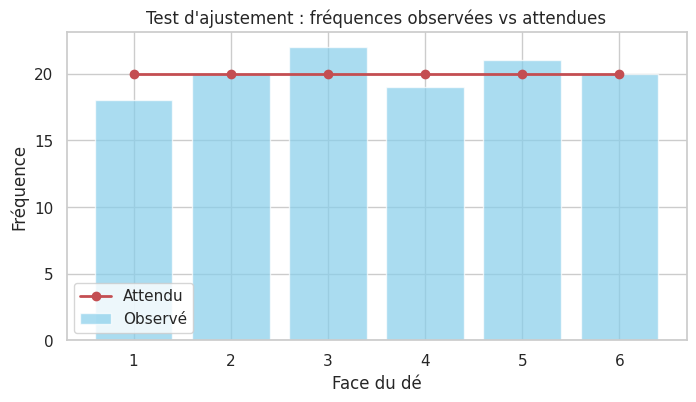

=== 2️⃣ Test d'indépendance ===

Tableau observé :
[[30 20]
 [25 25]]

Tableau attendu si indépendance :
[[27.5 22.5]
 [27.5 22.5]]

Chi² = 0.646, df = 1, p-value = 0.421
👉 On ne rejette pas H0 : aucune preuve de dépendance



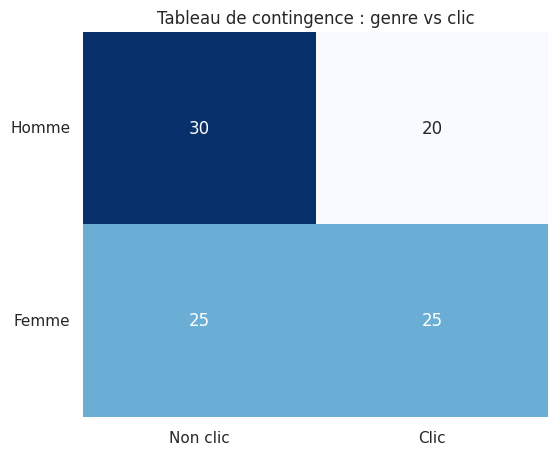

=== 3️⃣ Test d'homogénéité ===

Tableau observé :
[[30 20 10]
 [25 25 10]
 [20 30 10]]

Tableau attendu si homogénéité :
[[25. 25. 10.]
 [25. 25. 10.]
 [25. 25. 10.]]

Chi² = 4.000, df = 4, p-value = 0.406
👉 On ne rejette pas H0 : aucune preuve de différence



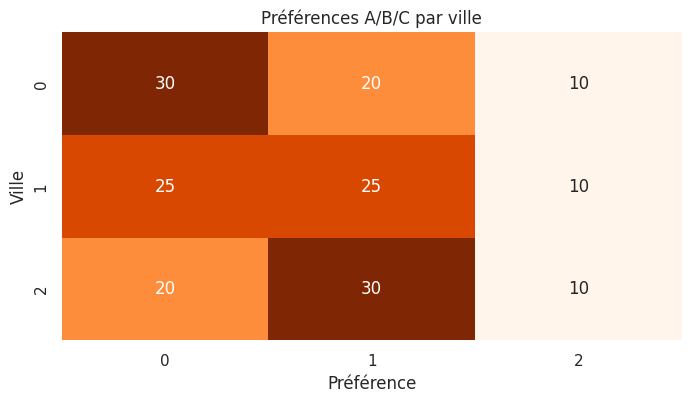

In [40]:
# --------------------------------------------------
# Chi² tests : trois cas pratiques pour Data Science
# Version lisible et pédagogique
# --------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")
np.random.seed(42)

# ===============================
# 1️⃣ Test d'ajustement (goodness-of-fit)
# ===============================
print("=== 1️⃣ Test d'ajustement (goodness-of-fit) ===\n")
# Ex : lancer un dé 120 fois
observed = np.array([18, 20, 22, 19, 21, 20])
expected = np.array([20, 20, 20, 20, 20, 20])  # distribution uniforme attendue

chi2_stat, p_val = stats.chisquare(f_obs=observed, f_exp=expected)

print(f"Fréquences observées : {observed}")
print(f"Fréquences attendues : {expected}")
print(f"Chi² = {chi2_stat:.3f}")
print(f"p-value = {p_val:.3f}")
if p_val < 0.05:
    print("👉 On rejette H0 : le dé n'est pas équilibré\n")
else:
    print("👉 On ne rejette pas H0 : aucune preuve que le dé soit biaisé\n")

# Visualisation
plt.figure(figsize=(8,4))
plt.bar(range(1,7), observed, color='skyblue', alpha=0.7, label='Observé')
plt.plot(range(1,7), expected, 'ro-', lw=2, label='Attendu')
plt.title("Test d'ajustement : fréquences observées vs attendues")
plt.xlabel("Face du dé")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

# ===============================
# 2️⃣ Test d'indépendance
# ===============================
print("=== 2️⃣ Test d'indépendance ===\n")
# Ex : Genre vs Conversion
observed = np.array([[30, 20], [25, 25]])  # Hommes/Femmes x Non clic/Clic
chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed)

print("Tableau observé :")
print(observed)
print("\nTableau attendu si indépendance :")
print(np.round(expected,2))
print(f"\nChi² = {chi2_stat:.3f}, df = {dof}, p-value = {p_val:.3f}")
if p_val < 0.05:
    print("👉 On rejette H0 : genre et clic ne sont pas indépendants\n")
else:
    print("👉 On ne rejette pas H0 : aucune preuve de dépendance\n")

# Visualisation
plt.figure(figsize=(6,5))
sns.heatmap(observed, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks([0.5,1.5], ['Non clic', 'Clic'])
plt.yticks([0.5,1.5], ['Homme', 'Femme'], rotation=0)
plt.title("Tableau de contingence : genre vs clic")
plt.show()

# ===============================
# 3️⃣ Test d'homogénéité
# ===============================
print("=== 3️⃣ Test d'homogénéité ===\n")
# Ex : préférences A/B/C dans 3 villes
observed = np.array([[30, 20, 10],
                     [25, 25, 10],
                     [20, 30, 10]])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed)

print("Tableau observé :")
print(observed)
print("\nTableau attendu si homogénéité :")
print(np.round(expected,2))
print(f"\nChi² = {chi2_stat:.3f}, df = {dof}, p-value = {p_val:.3f}")
if p_val < 0.05:
    print("👉 On rejette H0 : au moins une ville a une distribution de préférences différente\n")
else:
    print("👉 On ne rejette pas H0 : aucune preuve de différence\n")

# Visualisation
plt.figure(figsize=(8,4))
sns.heatmap(observed, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("Préférences A/B/C par ville")
plt.xlabel("Préférence")
plt.ylabel("Ville")
plt.show()
